# Capítulo 9: Técnicas de Aprendizaje No Supervisado

## Técnicas de Aprendizaje No Supervisado — Qué son y para qué sirven

---

## 1. Clustering
**Qué es:**  
Una familia de técnicas de aprendizaje no supervisado que agrupan datos según su similitud, sin usar etiquetas.

**Para qué sirve:**  
- Descubrir patrones ocultos en los datos.  
- Dividir poblaciones en segmentos naturales.  
- Preprocesar datos para otros modelos de ML.

---

### 1.1 K-Means
**Qué es:**  
Un algoritmo que divide los datos en *k* grupos, asignando cada punto al centroide más cercano y actualizando dichos centroides iterativamente.

**Para qué sirve:**  
- Agrupar datos de manera simple y eficiente.  
- Segmentar clientes, imágenes, documentos, etc.  
- Encontrar estructuras esféricas o bien separadas.

---

### 1.2 Mini-Batch K-Means
**Qué es:**  
Una variante de K-Means que usa muestras pequeñas (mini-batches) para actualizar los centroides.

**Para qué sirve:**  
- Escalar K-Means a grandes volúmenes de datos.  
- Reducir tiempo de entrenamiento manteniendo buena calidad del clustering.

---

### 1.3 Segmentación de Imágenes
**Qué es:**  
Una aplicación de clustering donde los píxeles se agrupan por similitud de color o ubicación.

**Para qué sirve:**  
- Simplificar imágenes dividiéndolas en regiones.  
- Preprocesar imágenes para visión artificial.  
- Detectar objetos o patrones visuales.

---

### 1.4 Clustering con Preprocesamiento
**Qué es:**  
El uso de técnicas como normalización, escalado o reducción de dimensionalidad antes de aplicar clustering.

**Para qué sirve:**  
- Mejorar resultados cuando las características tienen escalas diferentes.  
- Reducir ruido y capturar estructura relevante antes de agrupar.

---

### 1.5 DBSCAN
**Qué es:**  
Un algoritmo de clustering basado en densidad que agrupa puntos densamente conectados y detecta ruido/anomalías de forma natural.

**Para qué sirve:**  
- Descubrir grupos de forma arbitraria (no requiere k).  
- Funcionamiento robusto ante outliers.  
- Útil cuando hay regiones densas mezcladas con ruido.

---

## 2. Mezclas Gaussianas (Gaussian Mixture Models, GMM)
**Qué es:**  
Un modelo probabilístico que representa los datos como una mezcla de distribuciones gaussianas, permitiendo clusters suaves y superpuestos.

**Para qué sirve:**  
- Clustering cuando los datos no se separan claramente.  
- Modelar densidades complejas.  
- Asignar pertenencia probabilística a cada cluster.

---

### 2.1 Detección de Anomalías con GMM
**Qué es:**  
El uso de la probabilidad de cada punto según el modelo: valores muy improbables se consideran anomalías.

**Para qué sirve:**  
- Detectar comportamientos inusuales o sospechosos.  
- Monitorizar sistemas, fraudes o fallos operativos.

---

### 2.2 Modelo Bayesiano de Mezclas Gaussianas
**Qué es:**  
Una variante de GMM que usa métodos bayesianos para determinar automáticamente el número efectivo de componentes.

**Para qué sirve:**  
- Evitar elegir manualmente el número de clusters.  
- Modelar datos con estructura compleja y variable.  


In [2]:
#Pandas, Numpy, Matplotlib, Os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 

## <span style="color:green">1. Clustering</span>

#### <span style="color:blue"> 1.1 K-means</span>

K-Means es uno de los algoritmos de clustering más sencillo de utilizar, aunque tiene sus limitaciones.

Los datos tienen que estar: relativamente cirulares y poseer grupos de tamaños similares

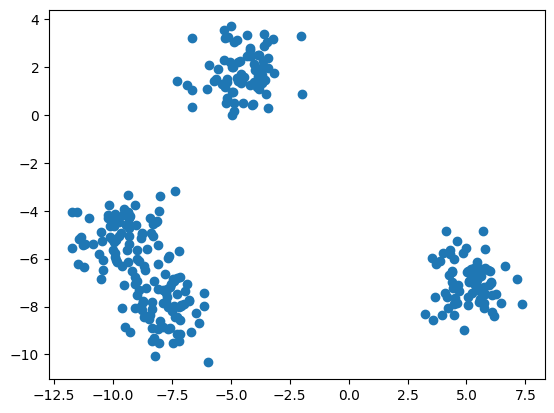

In [3]:
#Genera tu set de datos con make_blobs
from sklearn.datasets import make_blobs 
b1,b2 = make_blobs(n_samples=300, centers=4)
plt.scatter(b1[:,0], b1[:,1])
plt.show()

In [4]:
#Utilizar el algoritmo de k-means que proporciona python
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
predicciones = kmeans.fit_predict(b1)

In [5]:
#Visualiza una parte de los datos como ejemplo
b1[:5]

array([[-9.61829345, -6.31875555],
       [ 5.80523645, -6.40345741],
       [-3.44511642,  0.29879225],
       [ 6.0339485 , -6.96219599],
       [-9.88902862, -6.06780589]])

In [6]:
#Visualiza a qué cluster pertenecen esos datos
predicciones[:5]

array([3, 2, 0, 2, 3], dtype=int32)

In [7]:
#Visualizar los centros de gravedad de cada cluster
centros = kmeans.cluster_centers_
centros

array([[-4.55708727,  1.81092048],
       [-7.79656066, -8.09515411],
       [ 5.10221315, -6.98929982],
       [-9.55776558, -5.10283325]])

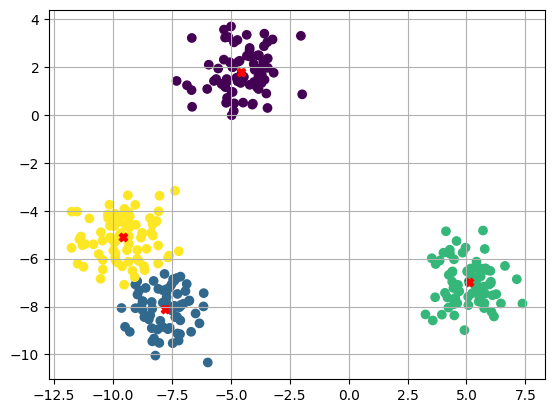

In [8]:
#Dibuja una gráfica donde cada cluster aparece de un color diferente con su respectivo centroide
plt.scatter(b1[:,0], b1[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centros[:,0], centros[:,1], c='red', marker='X')
plt.grid()
plt.show()

In [9]:
#Visualiza la distancia de cada instancia a cada uno de los centroides
kmeans.transform(b1)

array([[ 9.57640017,  2.54446501, 14.73577091,  1.21742789],
       [13.22322794, 13.70659412,  0.91512462, 15.41795883],
       [ 1.87696856,  9.45480843, 11.23268128,  8.15733031],
       ...,
       [13.3578682 , 13.80134839,  0.95185841, 15.53035779],
       [ 1.29125415,  9.23312576, 12.17567218,  7.57738506],
       [10.65405461,  1.00553257, 13.92998144,  2.96204946]],
      shape=(300, 4))

***

In [11]:
#Crear un array para inicializar los centroides
arr_centroides = np.array([[0,0],[3,3],[6,6],[9,9]])

In [12]:
#Utiliza Kmeans e inicializa tus centroides con el array de arriba
kmeans2 = KMeans(n_clusters=4, init=arr_centroides, n_init=1)

In [14]:
#Checar las predicciones que arroja tu algoritmo anterior
y_pred2 = kmeans2.fit_predict(b1)


In [15]:
#Visualiza los centros de gravedad de cada cluster
centros_gravedad = kmeans2.cluster_centers_
centros_gravedad

array([[ 5.10221315, -6.98929982],
       [-9.55776558, -5.10283325],
       [-4.55708727,  1.81092048],
       [-7.79656066, -8.09515411]])

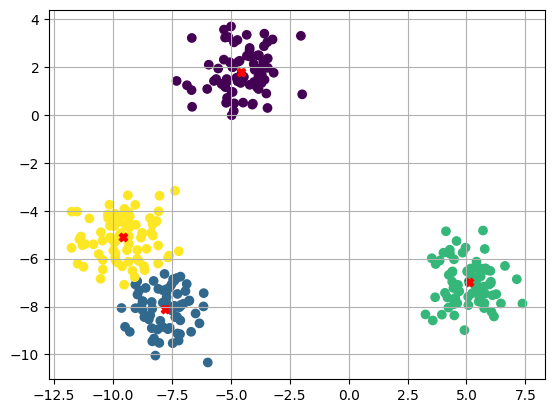

In [16]:
#Dibuja una gráfica donde cada cluster aparece de un color diferente con su respectivo centroide
plt.scatter(b1[:,0], b1[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centros[:,0], centros[:,1], c='red', marker='X')
plt.grid()
plt.show()


In [17]:
#Presenta la inercia del algoritmo 
kmeans.inertia_

498.6516258254724

In [19]:
#Presenta el puntaje del algoritmo (score)
kmeans.score(b1)

-498.6516258254724

***

#### <span style="color:blue"> 1.2 Mini-Batch K-Means</span>

Es básicamente el mismo algoritmo de K-Means pero corre los datos en pequeños lotes. Esto es ideal para datos en línea o bases de datos extensas. 

Aunque da resultados similares al K-Means, pierdes fidelidad

In [20]:
#Importar de Sklearn.Cluster el algoritmo de MiniBatchKmeans
from sklearn.cluster import MiniBatchKMeans
#Te puede salir un warning pero no afecta en el proceso 
mini_kmeans = MiniBatchKMeans(n_clusters=4)
mini_kmeans.fit(b1)

,n_clusters,4
,init,'k-means++'
,max_iter,100
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,None
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,'auto'


In [21]:
#Presenta el puntaje del algoritmo (score)
mini_kmeans.score(b1)

-497.39353126896384

***

In [22]:
#Corre el algoritmo limpio del inicio, presentar las predicciones y la inercia del mismo. 
kmeans_clean = KMeans(n_clusters=4)
predicciones_clean = kmeans_clean.fit_predict(b1)
inercia_clean = kmeans_clean.inertia_
inercia_clean

496.9559246638408

In [23]:
# Toma el algoritmo del inicio para calcular las inercias cuando se utiliza de 1 a 9 clusters
incercia1 = np.linspace(1,9,9)
inercia2 = []
for k in range(1,10):
    kmeans_loop = KMeans(n_clusters=k)
    predicciones_y = kmeans_loop.fit(b1)
    inercia2.append(kmeans_loop.inertia_)

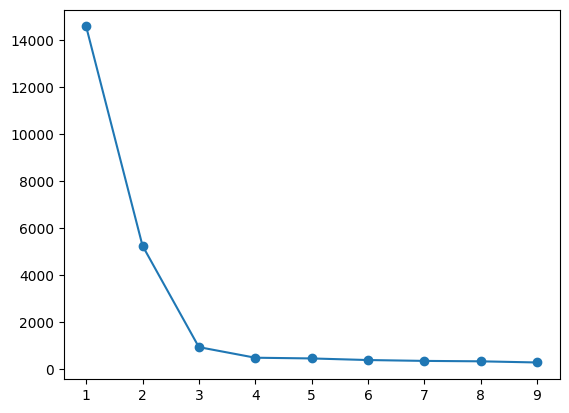

In [24]:
#Grafica las inercias anteriores
plt.plot(incercia1, inercia2, marker='o')

In [25]:
#Obtenen el coeficiente de silueta
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(b1, kmeans.labels_)

0.6870057409573621

In [30]:
#Ejecuta el algoritmo varias veces con diferentes clusters y obtenen sus coeficientes de silueta
bb = np.linspace(2,10,9)
cc = []
for k in range(2,11):
    kmeans_silhouette = KMeans(n_clusters=k)
    predicciones_silhouette = kmeans_silhouette.fit(b1)
    cc.append(silhouette_score(b1, kmeans_silhouette.labels_))

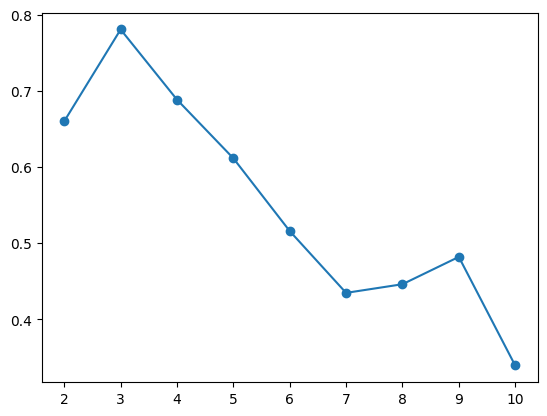

In [31]:
#Grafica los coeficientes de silueta
plt.plot(bb, cc, marker='o')

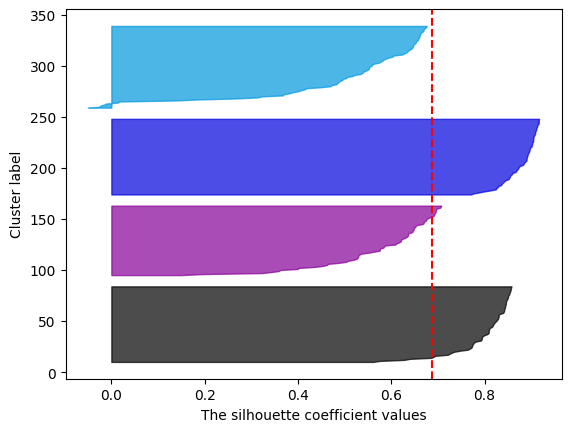

In [ ]:
#Realiza el diagrama de silueta 
# # este es para uno de ejemplo para hacer el tocho. es mas o menos igual cambiando aqui y alla algunos parametros 
import matplotlib.cm as cm 
sample_silhouette_values = silhouette_samples(b1, kmeans.labels_)
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0,
                      ith_cluster_silhouette_values,
                      facecolor=color,
                      edgecolor=color,
                      alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.axvline(x=silhouette_score(b1, kmeans.labels_), color="red", linestyle="--")
plt.show()


Para n_clusters = 2 La puntuación de silueta es: 0.54983184647466


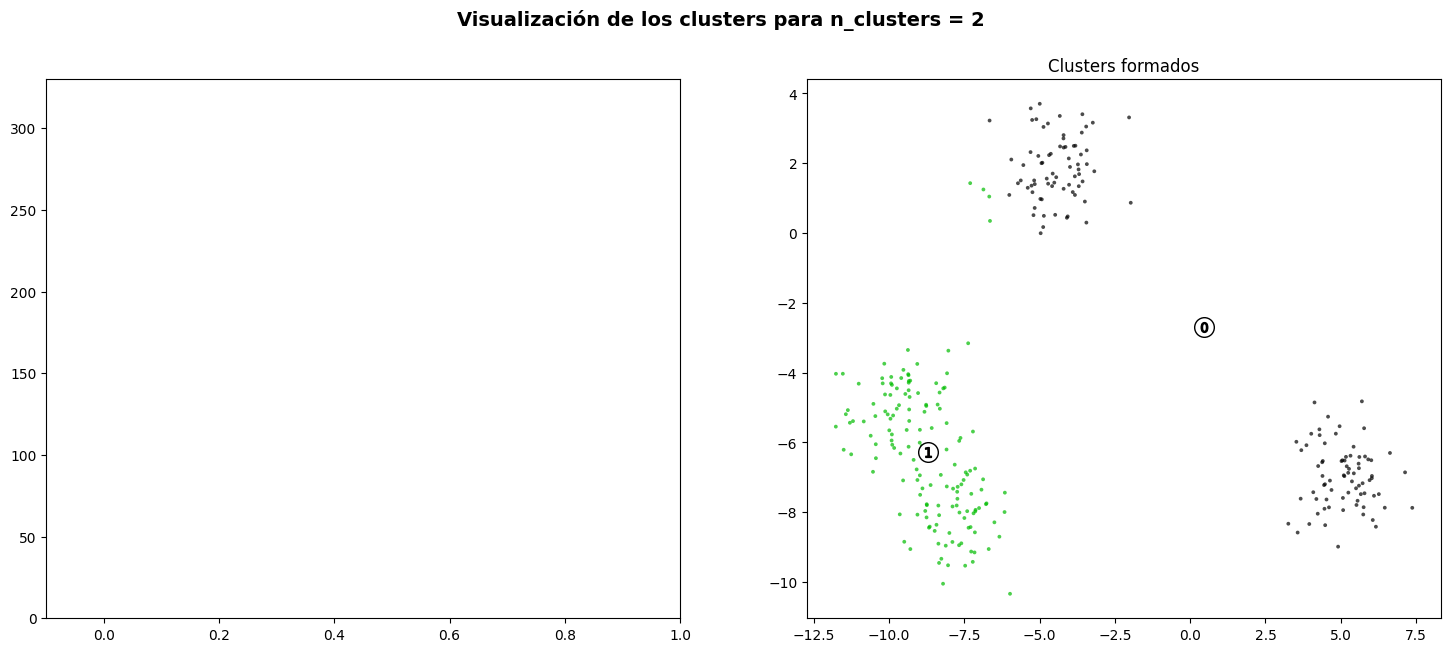

Para n_clusters = 3 La puntuación de silueta es: 0.780639611516705


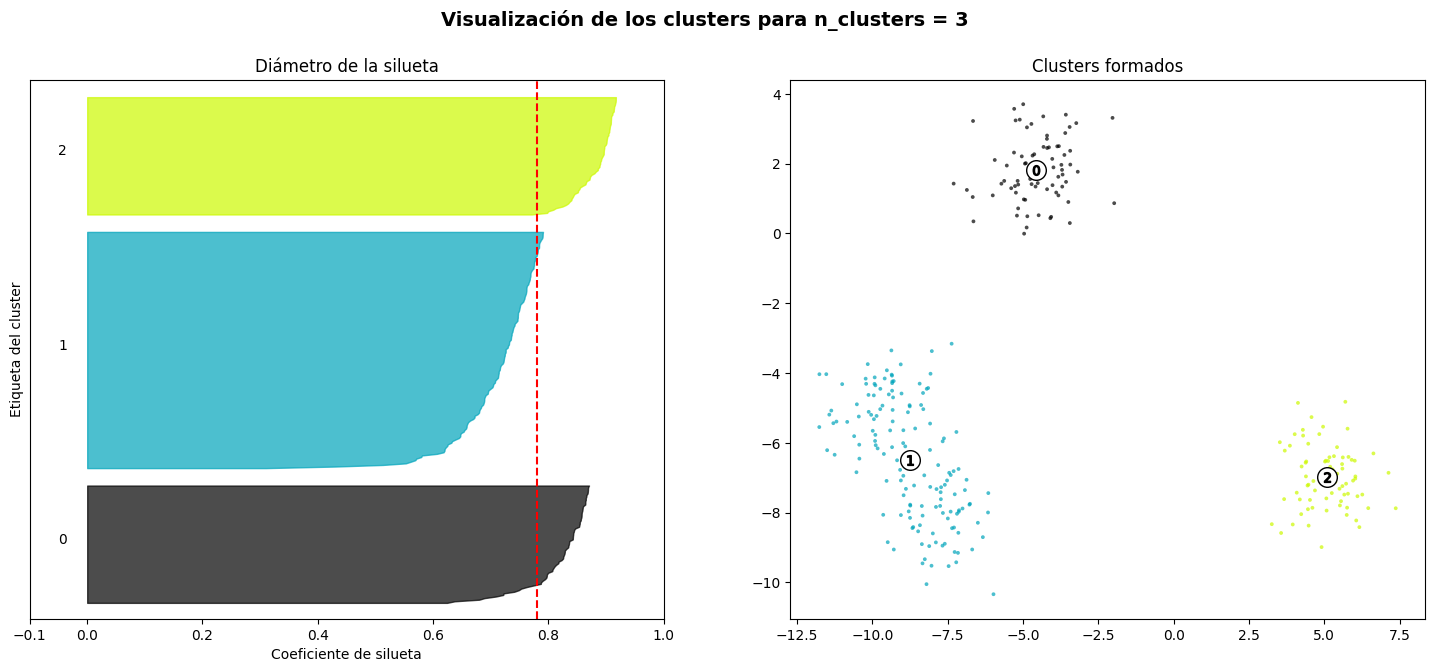

Para n_clusters = 4 La puntuación de silueta es: 0.6870057409573621


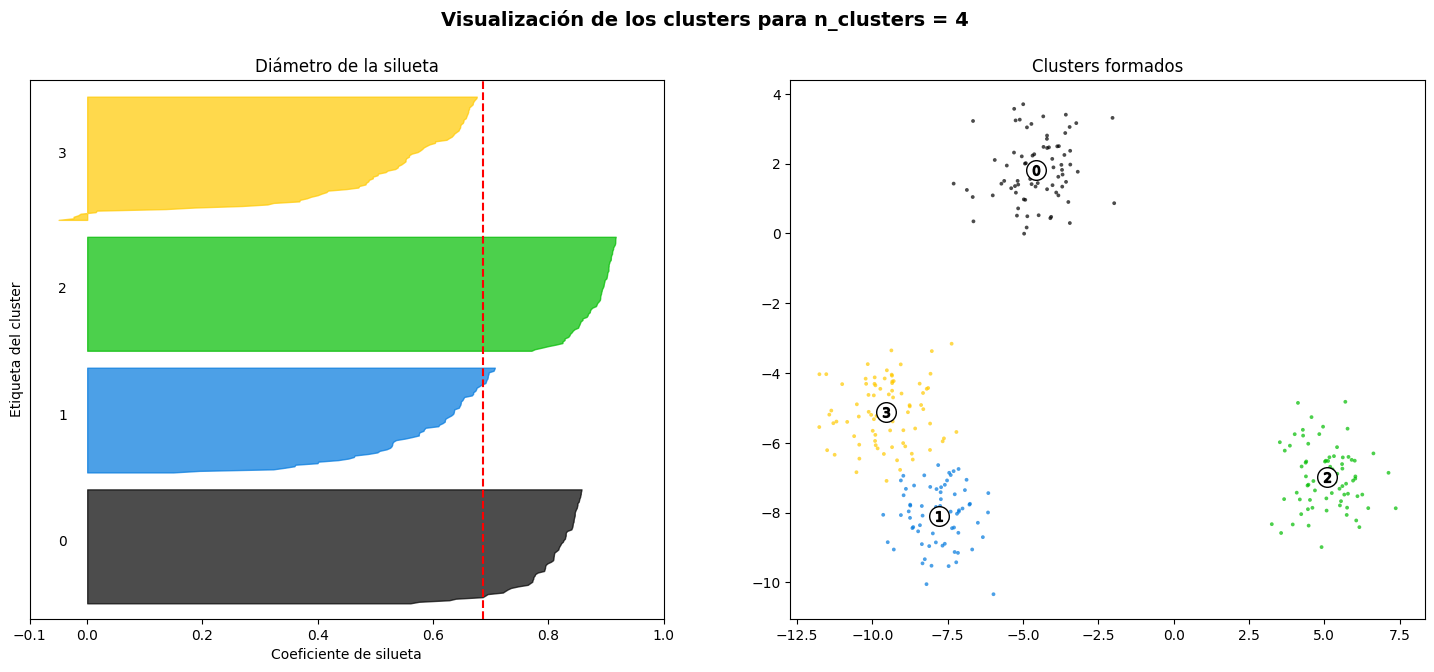

Para n_clusters = 5 La puntuación de silueta es: 0.5717864537071323


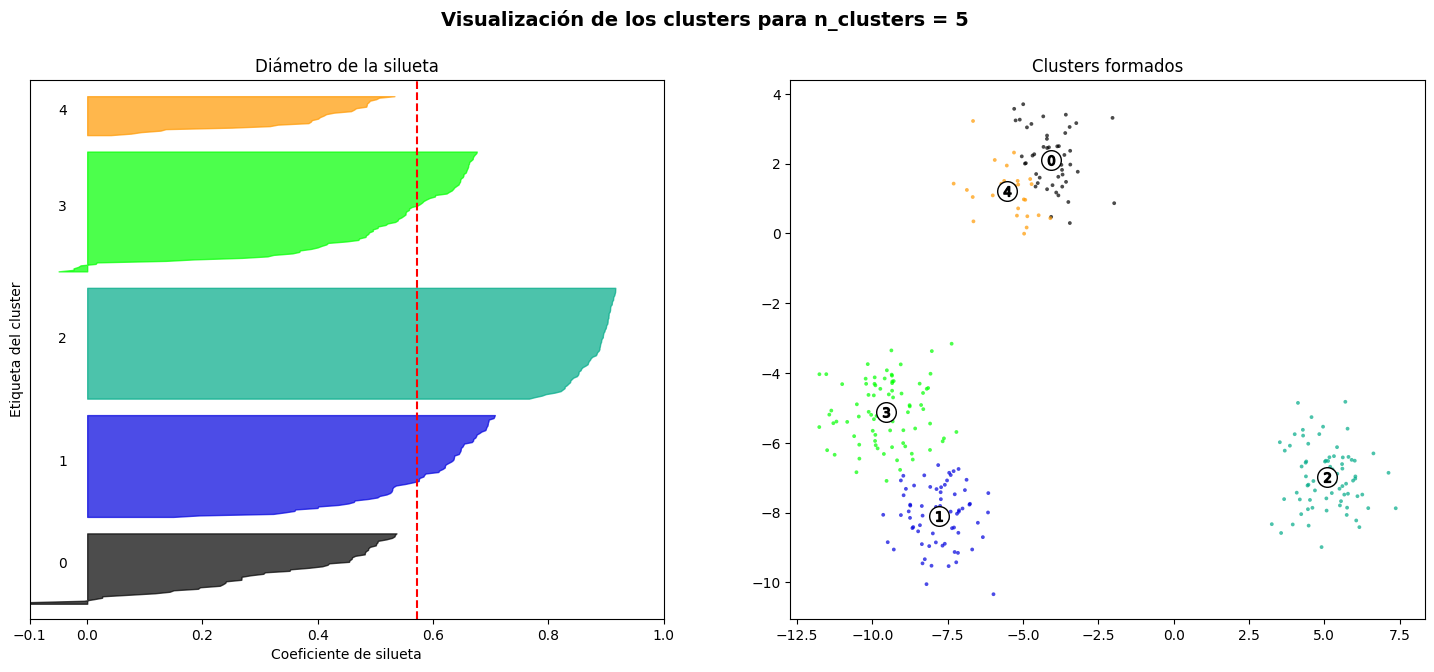

Para n_clusters = 6 La puntuación de silueta es: 0.506085089194674


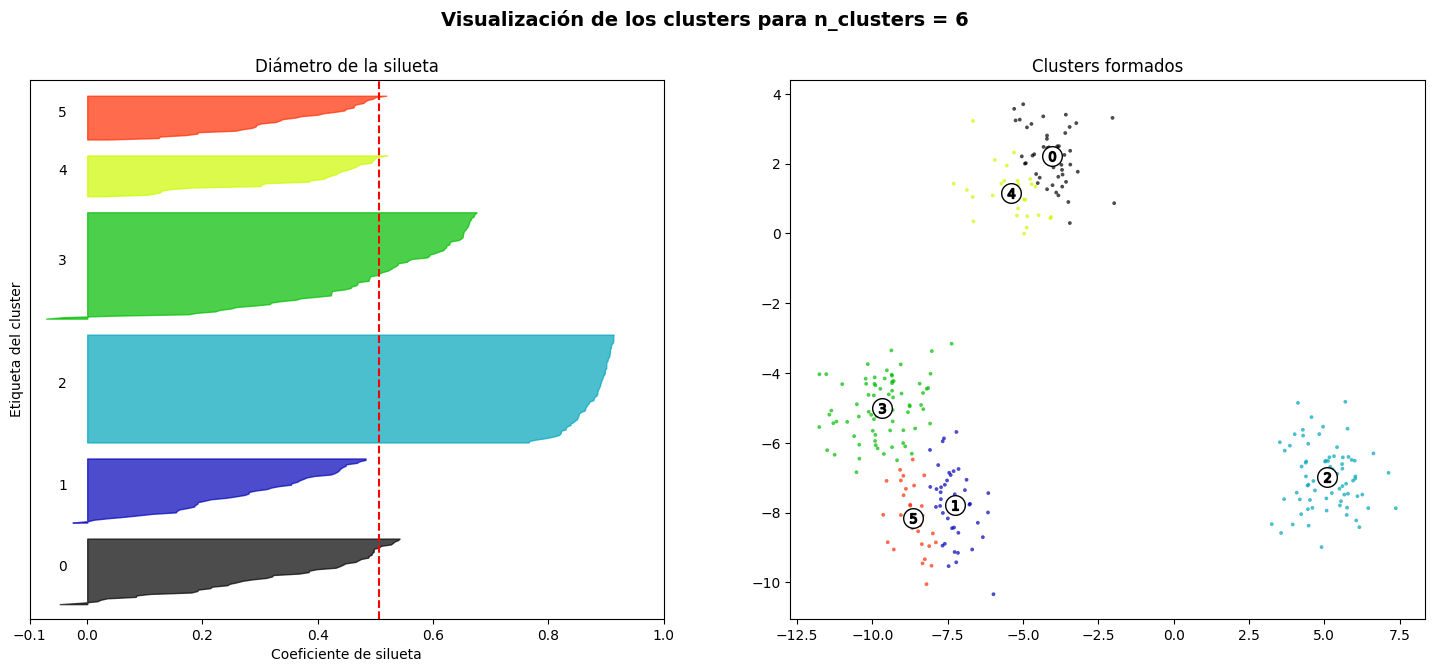

In [35]:
# realiza el diagrama de silueta
import matplotlib.cm as cm
X = b1
rango_de_clusters = [2, 3, 4, 5, 6]

for n_clusters in rango_de_clusters:
    fig, (axis1, axis2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    #
    axis1.set_xlim([-0.1, 1])
    axis1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # El agrupamiento se ejecuta con n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # El coeficiente de silueta se calcula
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "La puntuación de silueta es:", silhouette_avg)

    # El diagrama de silueta es solo para agrupaciones con más de dos clusters.
    if n_clusters > 2:
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        for i in range(n_clusters):
            # El "rectángulo" es la silueta del cluster i, realizando un trazado
            # de la silueta de los puntos.
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            # Línea horizontal que divide la silueta del cluster i
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                                0, ith_cluster_silhouette_values,
                                facecolor=color, edgecolor=color, alpha=0.7)
            # Etiquetado del gráfico
            axis1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Actualizar límites y límites
            y_lower = y_upper + 10  # 10 para separar la silueta de los clusters
        axis1.set_title("Diámetro de la silueta")
        axis1.set_xlabel("Coeficiente de silueta")
        axis1.set_ylabel("Etiqueta del cluster")

        axis1.axvline(x=silhouette_avg, color="red", linestyle="--")
        # clear yaxis labels ticks
        axis1.set_yticks([])
        axis1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2do gráfico mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    axis2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')

    # Etiquetado de los centroides
    centers = clusterer.cluster_centers_
    axis2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        axis2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    axis2.set_title("Clusters formados")

    plt.suptitle("Visualización de los clusters para n_clusters = %d" % n_clusters, fontsize=14,fontweight='bold')
    plt.show()
            

# si no me equivoco, segun las graficas, no tengo clusters de dos

***

#### <span style="color:blue"> 1.3 Segmentación de Imágenes</span>

La segmentación de imágenes es un ejemplo de aplicación del clustering. 


Existen diferentes niveles de segmentación, entre ellos está la segmentación semántica, segmentación por instancia y segmentación de imágenes por color.

In [36]:
#Importa imread
from matplotlib.image import imread
#Lee la imagen de la pelota de tenis
img = imread(os.path.join('tenis.jpg'))

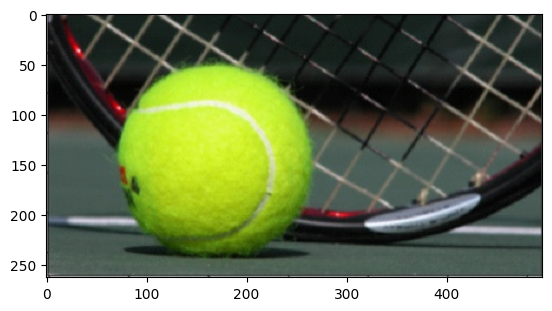

In [37]:
#Muestra la imagen
plt.imshow(img)

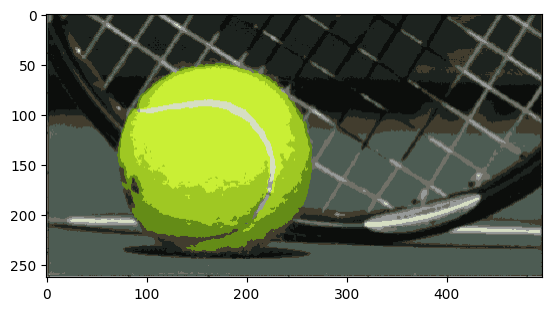

In [42]:
#Cambia la forma a la imagen para que K-means pueda correrlo
#Corre el algoritmo de K-Means
from sklearn.cluster import KMeans
k =10
vectores_imagen = img.reshape((-1,3))
kmeans_imagen = KMeans(n_clusters=k).fit(vectores_imagen)
centros = np.uint8(kmeans_imagen.cluster_centers_)
segmentada = centros[kmeans_imagen.labels_.flatten()]

imagen_segmentada = segmentada.reshape(img.shape)
plt.imshow(imagen_segmentada)

In [ ]:
#Varía el valor de k 

***

#### <span style="color:blue"> 1.4 Clustering con Preprocesamiento</span>

In [43]:
#Importa los dígitos de MNIST desde Sklearn 
#Asigna las variables x, y
from sklearn.datasets import load_digits
x,y = load_digits(return_X_y=True)

In [44]:
#Importa train_test_split
from sklearn.model_selection import train_test_split
#Separa los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [45]:
#Arma una regresión logística
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression()
Log_reg.fit(x_train, y_train)

d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
#Despliega el puntaje de la regresión (log.score)
logscore = Log_reg.score(x_test, y_test)
print(logscore)

0.9733333333333334


In [47]:
#Arma un pipeline que incluya el algoritmo de K-Means
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('kmeans', KMeans(n_clusters=10)),
                     ('log_reg', LogisticRegression())])


#Ajusta el pipeline
pipeline.fit(x_train, y_train)

d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('kmeans', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None


In [48]:
#Despliega el puntaje del pipeline anterior
pipeline_score = pipeline.score(x_test, y_test)
print(pipeline_score)

0.9088888888888889


In [49]:
#Arma un GridSearch para identificar con cuántos clusters se puede correr
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(5,15))
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy',verbose =3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..............kmeans__n_clusters=5;, score=0.741 total time=   0.3s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..............kmeans__n_clusters=5;, score=0.800 total time=   0.3s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 3/5] END ..............kmeans__n_clusters=5;, score=0.777 total time=   0.2s
[CV 4/5] END ..............kmeans__n_clusters=5;, score=0.673 total time=   0.0s
[CV 5/5] END ..............kmeans__n_clusters=5;, score=0.680 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 1/5] END ..............kmeans__n_clusters=6;, score=0.756 total time=   0.0s
[CV 2/5] END ..............kmeans__n_clusters=6;, score=0.807 total time=   0.0s
[CV 3/5] END ..............kmeans__n_clusters=6;, score=0.803 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 4/5] END ..............kmeans__n_clusters=6;, score=0.844 total time=   0.1s
[CV 5/5] END ..............kmeans__n_clusters=6;, score=0.762 total time=   0.0s
[CV 1/5] END ..............kmeans__n_clusters=7;, score=0.800 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 2/5] END ..............kmeans__n_clusters=7;, score=0.867 total time=   0.0s
[CV 3/5] END ..............kmeans__n_clusters=7;, score=0.822 total time=   0.0s
[CV 4/5] END ..............kmeans__n_clusters=7;, score=0.855 total time=   0.0s
[CV 5/5] END ..............kmeans__n_clusters=7;, score=0.784 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 1/5] END ..............kmeans__n_clusters=8;, score=0.870 total time=   0.0s
[CV 2/5] END ..............kmeans__n_clusters=8;, score=0.900 total time=   0.0s
[CV 3/5] END ..............kmeans__n_clusters=8;, score=0.885 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 4/5] END ..............kmeans__n_clusters=8;, score=0.877 total time=   0.0s
[CV 5/5] END ..............kmeans__n_clusters=8;, score=0.851 total time=   0.0s
[CV 1/5] END ..............kmeans__n_clusters=9;, score=0.867 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 2/5] END ..............kmeans__n_clusters=9;, score=0.930 total time=   0.0s
[CV 3/5] END ..............kmeans__n_clusters=9;, score=0.903 total time=   0.0s
[CV 4/5] END ..............kmeans__n_clusters=9;, score=0.911 total time=   0.0s
[CV 5/5] END ..............kmeans__n_clusters=9;, score=0.862 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 1/5] END .............kmeans__n_clusters=10;, score=0.922 total time=   0.0s
[CV 2/5] END .............kmeans__n_clusters=10;, score=0.922 total time=   0.0s
[CV 3/5] END .............kmeans__n_clusters=10;, score=0.896 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 4/5] END .............kmeans__n_clusters=10;, score=0.911 total time=   0.0s
[CV 5/5] END .............kmeans__n_clusters=10;, score=0.881 total time=   0.0s
[CV 1/5] END .............kmeans__n_clusters=11;, score=0.896 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 2/5] END .............kmeans__n_clusters=11;, score=0.922 total time=   0.0s
[CV 3/5] END .............kmeans__n_clusters=11;, score=0.896 total time=   0.0s
[CV 4/5] END .............kmeans__n_clusters=11;, score=0.948 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 5/5] END .............kmeans__n_clusters=11;, score=0.922 total time=   0.0s
[CV 1/5] END .............kmeans__n_clusters=12;, score=0.930 total time=   0.0s
[CV 2/5] END .............kmeans__n_clusters=12;, score=0.933 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 3/5] END .............kmeans__n_clusters=12;, score=0.922 total time=   0.0s
[CV 4/5] END .............kmeans__n_clusters=12;, score=0.937 total time=   0.0s
[CV 5/5] END .............kmeans__n_clusters=12;, score=0.896 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 1/5] END .............kmeans__n_clusters=13;, score=0.919 total time=   0.0s
[CV 2/5] END .............kmeans__n_clusters=13;, score=0.944 total time=   0.0s
[CV 3/5] END .............kmeans__n_clusters=13;, score=0.941 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 4/5] END .............kmeans__n_clusters=13;, score=0.944 total time=   0.0s
[CV 5/5] END .............kmeans__n_clusters=13;, score=0.918 total time=   0.0s
[CV 1/5] END .............kmeans__n_clusters=14;, score=0.944 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

[CV 2/5] END .............kmeans__n_clusters=14;, score=0.941 total time=   0.0s
[CV 3/5] END .............kmeans__n_clusters=14;, score=0.929 total time=   0.0s
[CV 4/5] END .............kmeans__n_clusters=14;, score=0.926 total time=   0.0s
[CV 5/5] END .............kmeans__n_clusters=14;, score=0.914 total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as

,estimator,Pipeline(step...egression())])
,param_grid,"{'kmeans__n_clusters': range(5, 15)}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_clusters,13


In [50]:
#Obtene el mejor parámetro con grid.best_params_
best_k = grid.best_params_
print(best_k)

{'kmeans__n_clusters': 13}


In [51]:
#Obtene el puntaje del GridSearch (Grid.score)
grid_score = grid.score(x_test, y_test)
print(grid_score)

0.9488888888888889


***

#### <span style="color:blue"> 1.4 DBSCAN</span>

Puede funcionar cuando K-Means esta limitado. Este algoritmo define los clusters como regiones continuas de alta densidad.

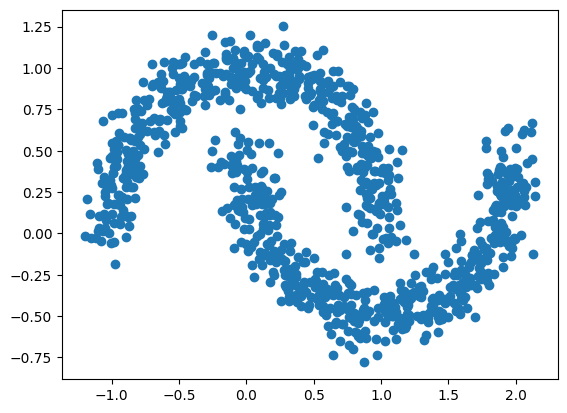

In [52]:
#Crea set de datos con make_moons y graficarlo  # lo mismo de antes
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(x[:,0], x[:,1])

In [ ]:
#Importa DBSCAN de Sklearn y correrlo
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5) # el eps tiene que ser muy bajo porque los datos estan muy juntos
dbscan.fit(x)

,eps,0.05
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [58]:
#Verifica como se hizo la agrupación de las instancias con la función labels_
dbscan.labels_

array([-1, -1,  0,  1,  2, -1,  3, -1,  0,  0, -1, 19, -1,  4,  1,  5, 12,
       -1,  6,  3, -1,  7, -1, 22,  2,  1, -1,  8, -1,  9, -1, 34, 47, 25,
       40, 10, -1, 18, 11, -1, 12, -1, -1, 13, -1, -1, -1, -1,  0,  1, -1,
       34, -1, 14, 15, 16, -1, 17, 17, 18, -1,  4, 19, 38, -1,  1, 20, 19,
       -1, -1, -1, 21,  6, -1, 22, 21, -1, 22, 20, -1, -1, -1, 23, 21, 24,
       -1, 43, 25, 19, 26,  4, -1, -1, 19,  0, 12, 12, 25, -1,  6, 27, 34,
       10,  2, -1, 23, -1,  8,  1, 28, -1, -1, -1, 45, 26, 29,  5, 20, 12,
       30,  0, -1, -1, -1, -1,  0, 28, 30, 21, -1, -1, 30, 12,  3, 28, -1,
        2, -1, 29,  2, 46, 24, 31, -1, -1, 28, 20, -1, -1, -1,  2, -1, 12,
       17, 14, -1,  5, 21, -1, 18, 17, 45, 29, -1, -1, -1, 22, 17, 29, 23,
       32, 12,  3, -1, 22, 11, 22, 21, -1, 20, 33, -1, -1, 34, 10, 41, 27,
        4, 17, 23, 30,  0, -1, -1, 29, -1,  0,  0, -1, 34, 28, 29, -1, 17,
       -1, -1,  8,  1, -1, 22, -1, -1, -1,  0, 22, 30, -1, -1, 13, 37, 19,
       -1,  0, 22, 31, 12

In [59]:
#Modifica el parámetro epsilon del algoritmo DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.20, min_samples=5)
dbscan.fit(x)

,eps,0.2
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [63]:
#Importa Kneighbors Classifier para clasificar los datos de DBSCAN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_]) #el knn tiene que ser muy alto porque los datos estan muy juntos

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [64]:
#predice las clasificación de datos aleatorios para ejemplificar el método 
x_nuevo = np.array([[1.5, -0.1], [0.1, 0.2], [0.5, 0.7], [1.0, 0.5]])
knn.predict(x_nuevo)

array([0, 0, 0, 0])

***

### <span style="color:green"> 2. Mezclas Gaussianas</span>

Las Mezclas Gaussianas es la manera más robusta de hacer clusters pero, también es la más pesada.

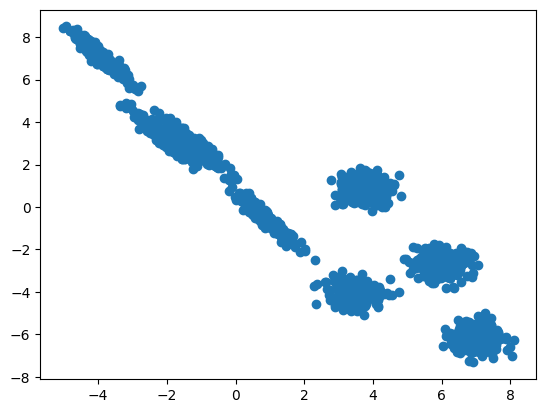

In [65]:
#Crea set de datos con make blobs y graficarlo
from sklearn.datasets import make_blobs
x1,y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)
x1 = x1.dot( np.array([[0.6, -0.6], [-0.4, 0.8]]) )  # rotación
x2,y2 = make_blobs(n_samples=1000, centers=4, cluster_std=0.40, random_state=0)
x2=x2+[5,-7]
x=np.r_[x1,x2]
y=np.r_[y1,y2]
plt.scatter(x[:,0], x[:,1])

In [66]:
#Importa GaussianMixture de Sklearn
from sklearn.mixture import GaussianMixture

In [67]:
#Genera GaussianMixture especificando los parámetros n_components y n_int
gauss = GaussianMixture(n_components=4, n_init=10)
gauss.fit(x)

,n_components,4
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,10
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,None


In [69]:
#Obten los pesos que le asignó a los datos 
gauss.weights_

array([0.51235134, 0.23764866, 0.125     , 0.125     ])

In [70]:
#Obten las medias de los datos
gauss.means_

array([[-1.45157318,  2.98398577],
       [ 4.80957185, -3.36668484],
       [ 3.732078  ,  0.84430371],
       [ 7.02659503, -6.12066842]])

In [71]:
#Obten la matriz de covarianzas
gauss.covariances_

array([[[ 3.55796439e+00, -5.43943409e+00],
        [-5.43943409e+00,  8.53268308e+00]],

       [[ 1.58314709e+00,  8.46954964e-01],
        [ 8.46954964e-01,  6.27438881e-01]],

       [[ 1.43921674e-01, -2.88148774e-03],
        [-2.88148774e-03,  1.61033759e-01]],

       [[ 1.36957720e-01, -3.39931242e-03],
        [-3.39931242e-03,  1.66399351e-01]]])

In [72]:
#Verifca si convergió 
gauss.converged_

True

In [73]:
#Obten el número de iteraciones
gauss.n_iter_

9

In [74]:
#Predecé el cluster de los primeros 5 datos 
gauss.predict(x[:5])

array([0, 0, 0, 0, 0])

In [75]:
#Obten las probabilidades de una clustering correcto de cada uno de los datos
gauss.predict_proba(x[:5])

array([[1.00000000e+000, 1.02271589e-320, 4.47749197e-155,
        0.00000000e+000],
       [1.00000000e+000, 2.74357040e-116, 3.02123971e-042,
        4.41028257e-208],
       [1.00000000e+000, 0.00000000e+000, 8.20993501e-172,
        0.00000000e+000],
       [1.00000000e+000, 1.12574069e-141, 1.40373154e-061,
        1.60516840e-246],
       [1.00000000e+000, 2.40259584e-034, 7.33696905e-015,
        2.59440900e-100]])

In [77]:
#Genera nuevos datos para evaluar la eficiencia del clasificador
x_nuevos, y_nuevos = gauss.sample(10)

In [78]:
#Despliega los datos nuevos de x
x_nuevos

array([[ 1.92071736, -1.54580917],
       [-2.8449861 ,  5.65953634],
       [-1.0937266 ,  1.91180668],
       [-5.24571304,  8.09491545],
       [-0.63604287,  1.09059603],
       [ 2.06244381, -5.90810278],
       [ 3.72066998, -3.98907831],
       [ 5.1430023 , -3.238947  ],
       [ 8.13802972, -1.14921182],
       [ 3.94823912,  1.63847659]])

In [79]:
#Clasifica los nuevos datos
y_nuevos

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2])

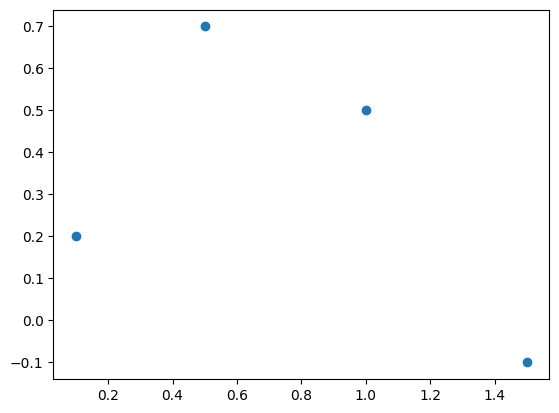

In [80]:
#Grafica los nuevos datos
plt.scatter(x_nuevo[:,0],x_nuevo[:,1])

***

Las anomalías son cualquier dato que se encuentre fuera de la zona de alta densidad.

In [81]:
#Obten los puntajes de cada una de las muestras
densidad = gauss.score_samples(x)

In [82]:
#Convierte los puntajes en percentiles y conoce el resultado con percentil 4
#Obten las anomalías que son menores al umbral de densidad que definiste
#Visualiza las anomalías
umbral = np.percentile(densidad, 4)
anomalias = x[densidad < umbral]
anomalias

array([[-2.32133255e+00,  3.23222737e+00],
       [-1.93493273e+00,  2.63102995e+00],
       [-2.72187044e+00,  3.84634819e+00],
       [-3.17665224e+00,  4.66025739e+00],
       [-2.94910109e+00,  4.25778286e+00],
       [-3.35956076e+00,  4.80312982e+00],
       [-3.37278096e+00,  4.75135888e+00],
       [-3.39433118e+00,  6.93554787e+00],
       [-2.57510516e+00,  3.57525764e+00],
       [-2.10424657e+00,  2.94777763e+00],
       [-2.11143110e+00,  2.93538610e+00],
       [-2.83294734e+00,  4.09882047e+00],
       [-2.22421880e+00,  3.01152715e+00],
       [-2.20188193e+00,  3.07757850e+00],
       [-2.49544283e+00,  3.55403167e+00],
       [-2.49727087e+00,  3.48842870e+00],
       [-2.19931870e+00,  3.10610615e+00],
       [-3.18200318e+00,  4.68644379e+00],
       [-2.80686646e+00,  3.68879750e+00],
       [-2.31112991e+00,  3.17286886e+00],
       [ 6.89831192e+00, -7.32079356e+00],
       [ 2.92703084e+00, -3.30327828e+00],
       [ 6.11183173e+00, -1.88779525e+00],
       [ 4.

In [ ]:
#Varía el percentil

***

#### <span style="color:blue"> 2.1 Detección de Anomalías</span>


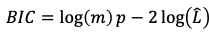

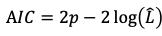

m=número de instancias
p=número de parámetros 
L= Verosimilitud

In [83]:
#calcula el BIC para los datos
#calcula el AIC para los datos
gauss.bic(x), gauss.aic(x)

(np.float64(13471.531386522092), np.float64(13342.710629952624))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection

[CV 1/5] END ......................n_components=2;, score=nan total time=   0.2s
[CV 2/5] END ......................n_components=2;, score=nan total time=   0.1s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection

[CV 3/5] END ......................n_components=2;, score=nan total time=   0.1s
[CV 4/5] END ......................n_components=2;, score=nan total time=   0.1s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 5/5] END ......................n_components=2;, score=nan total time=   0.1s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 1/5] END ......................n_components=3;, score=nan total time=   0.3s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 2/5] END ......................n_components=3;, score=nan total time=   0.5s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 3/5] END ......................n_components=3;, score=nan total time=   0.4s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection

[CV 4/5] END ......................n_components=3;, score=nan total time=   0.3s
[CV 5/5] END ......................n_components=3;, score=nan total time=   0.1s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection

[CV 1/5] END ......................n_components=4;, score=nan total time=   0.0s
[CV 2/5] END ......................n_components=4;, score=nan total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection

[CV 3/5] END ......................n_components=4;, score=nan total time=   0.1s
[CV 4/5] END ......................n_components=4;, score=nan total time=   0.1s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection

[CV 5/5] END ......................n_components=4;, score=nan total time=   0.0s
[CV 1/5] END ......................n_components=5;, score=nan total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection

[CV 2/5] END ......................n_components=5;, score=nan total time=   0.0s
[CV 3/5] END ......................n_components=5;, score=nan total time=   0.0s
[CV 4/5] END ......................n_components=5;, score=nan total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection

[CV 5/5] END ......................n_components=5;, score=nan total time=   0.1s
[CV 1/5] END ......................n_components=6;, score=nan total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection

[CV 2/5] END ......................n_components=6;, score=nan total time=   0.0s
[CV 3/5] END ......................n_components=6;, score=nan total time=   0.0s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection

[CV 4/5] END ......................n_components=6;, score=nan total time=   0.3s
[CV 5/5] END ......................n_components=6;, score=nan total time=   0.1s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 1/5] END ......................n_components=7;, score=nan total time=   0.1s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 2/5] END ......................n_components=7;, score=nan total time=   0.4s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 3/5] END ......................n_components=7;, score=nan total time=   0.2s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection

[CV 4/5] END ......................n_components=7;, score=nan total time=   0.3s
[CV 5/5] END ......................n_components=7;, score=nan total time=   0.1s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 1/5] END ......................n_components=8;, score=nan total time=   0.2s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 2/5] END ......................n_components=8;, score=nan total time=   0.2s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 3/5] END ......................n_components=8;, score=nan total time=   1.8s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 4/5] END ......................n_components=8;, score=nan total time=   0.8s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 5/5] END ......................n_components=8;, score=nan total time=   0.3s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 1/5] END ......................n_components=9;, score=nan total time=   0.5s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 2/5] END ......................n_components=9;, score=nan total time=   0.7s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 3/5] END ......................n_components=9;, score=nan total time=   0.5s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


[CV 4/5] END ......................n_components=9;, score=nan total time=   0.3s


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_validation.py", line 940, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


[CV 5/5] END ......................n_components=9;, score=nan total time=   0.2s


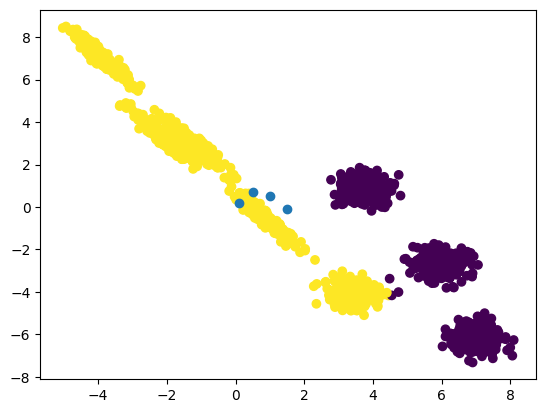

In [85]:
#Puedes hacer el GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_components=range(2,10))
grid = GridSearchCV(GaussianMixture(n_init=10), param_grid, cv=5, scoring='neg_log_loss',verbose =3)
grid.fit(x)
grid.best_params_
grid.best_score_
#Visualiza los resultados
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results[['param_n_components','mean_test_score','std_test_score']]
#Visualiza los clusters
grid.best_estimator_.predict(x)
#Visualiza los clusters
plt.scatter(x[:,0], x[:,1], c=grid.best_estimator_.predict(x), cmap='viridis')
#Obten las probabilidades de una clustering correcto de cada uno de los datos
gauss.predict_proba(x[:5])
#Genera nuevos datos para evaluar la eficiencia del clasificador
x_nuevos, y_nuevos = gauss.sample(10)
#Despliega los datos nuevos de x
x_nuevos
#Clasifica los nuevos datos
y_nuevos
#Grafica los nuevos datos
plt.scatter(x_nuevo[:,0],x_nuevo[:,1])


***

#### <span style="color:blue"> 2.2 Modelo Bayesiano de Mezclas Gaussianas</span>

La única labor en este modelo es adivinar un número de clusters mayor al óptimo. 


Ojo: a los clusters que no sirven simplemente se les asignará el valor 0

In [87]:
#Importa BayesianGaussianMixture
from sklearn.mixture import BayesianGaussianMixture

In [91]:
#Adivina y asigna la cantidad de clusters al algoritmo
bayes_gauss = BayesianGaussianMixture(n_components=3,n_init=10)
bayes_gauss.fit(x)
#Redondea los pesos con np.round 
np.round(bayes_gauss.weights_)

array([1., 0., 0.])